In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("Customer Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID",'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','MINIMUM_PAYMENTS'],axis=1,inplace=True)

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

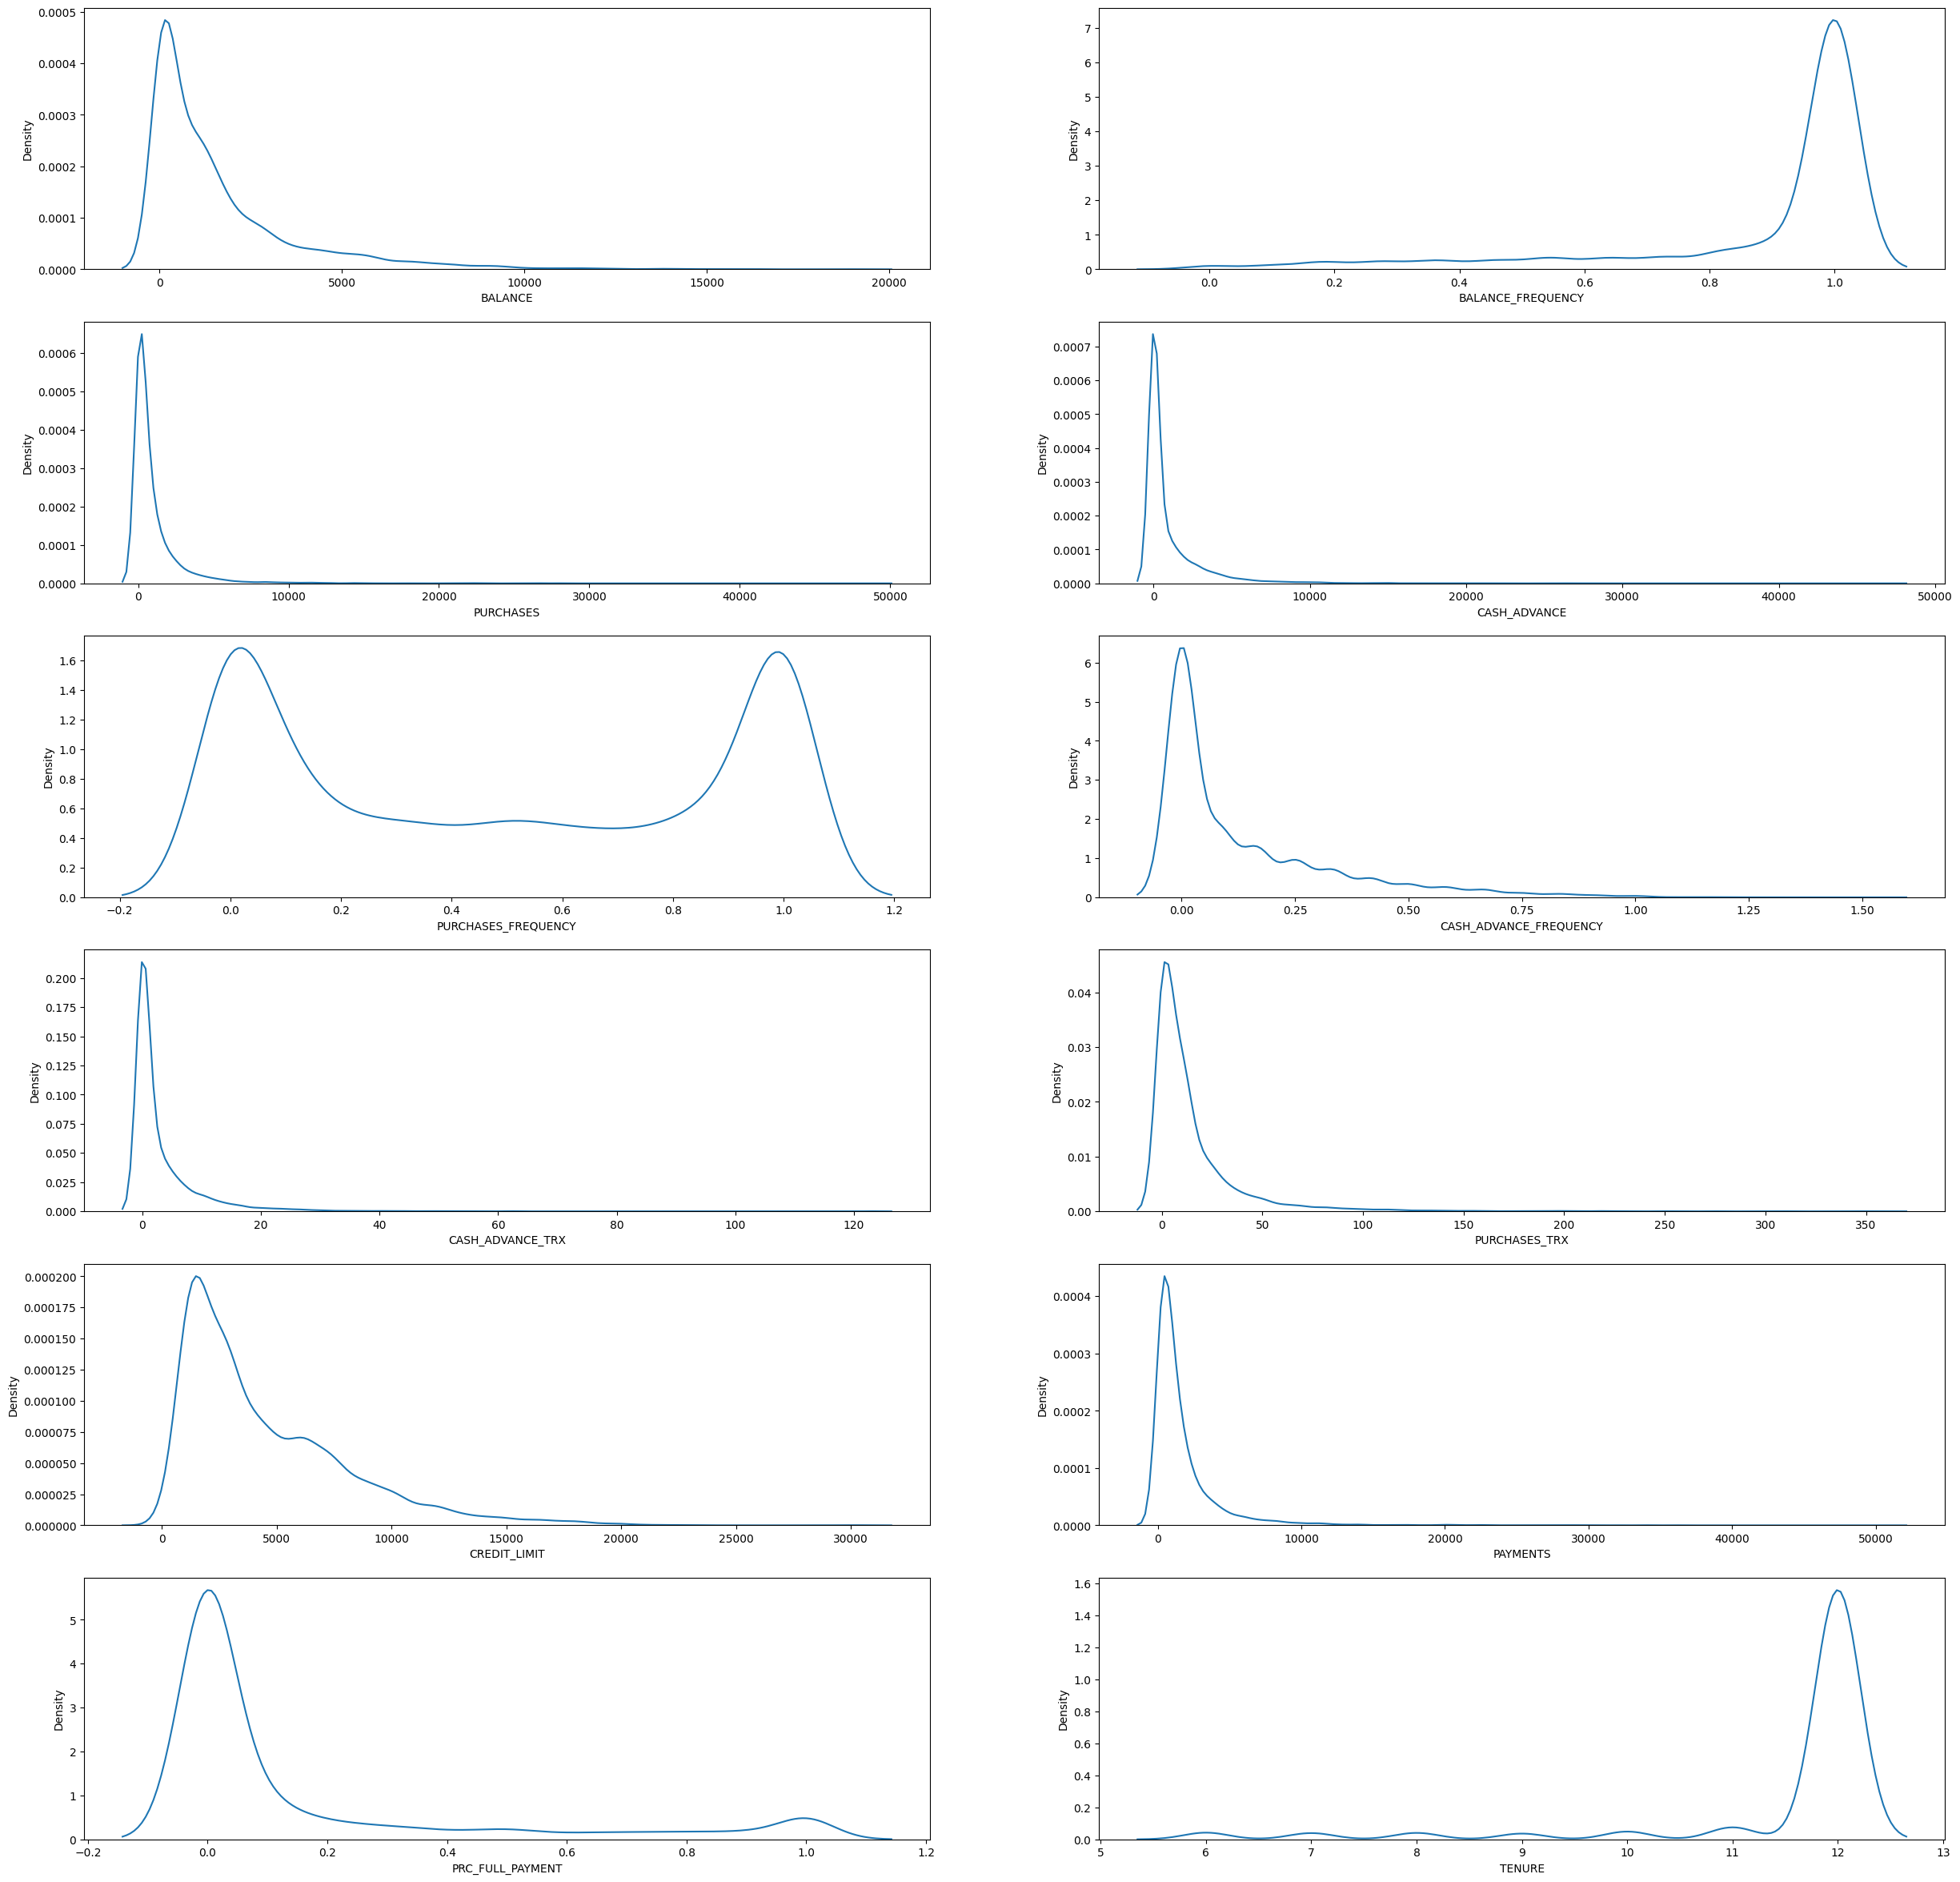

In [12]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

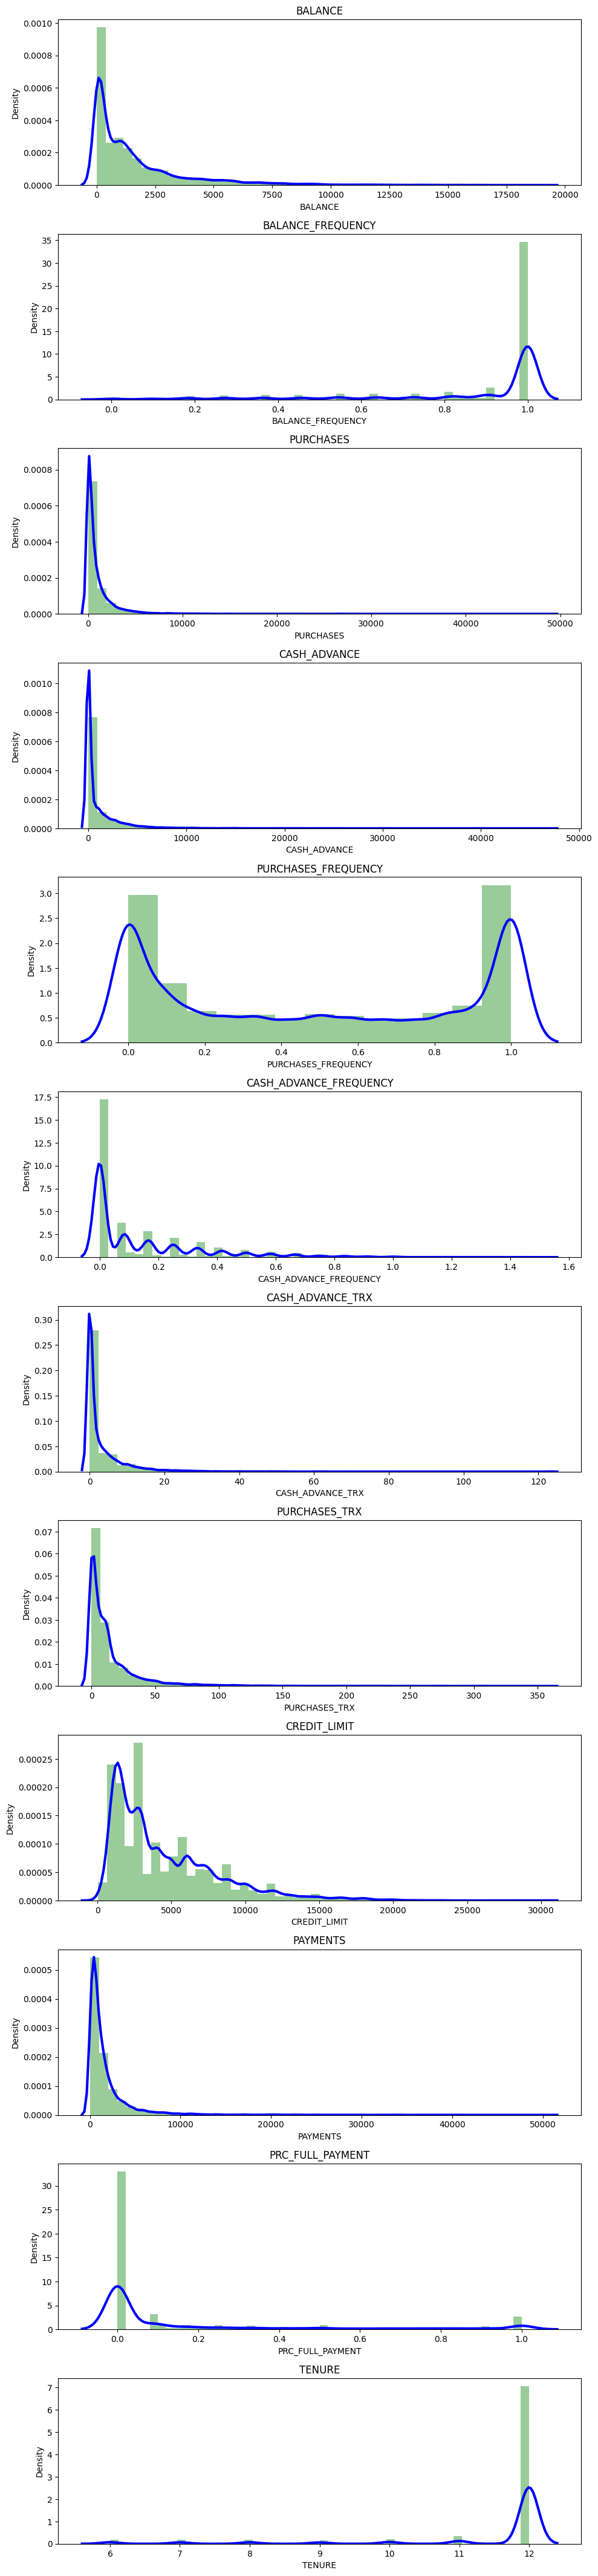

In [13]:
plt.figure(figsize=(10,60))
for i in range(0,12):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

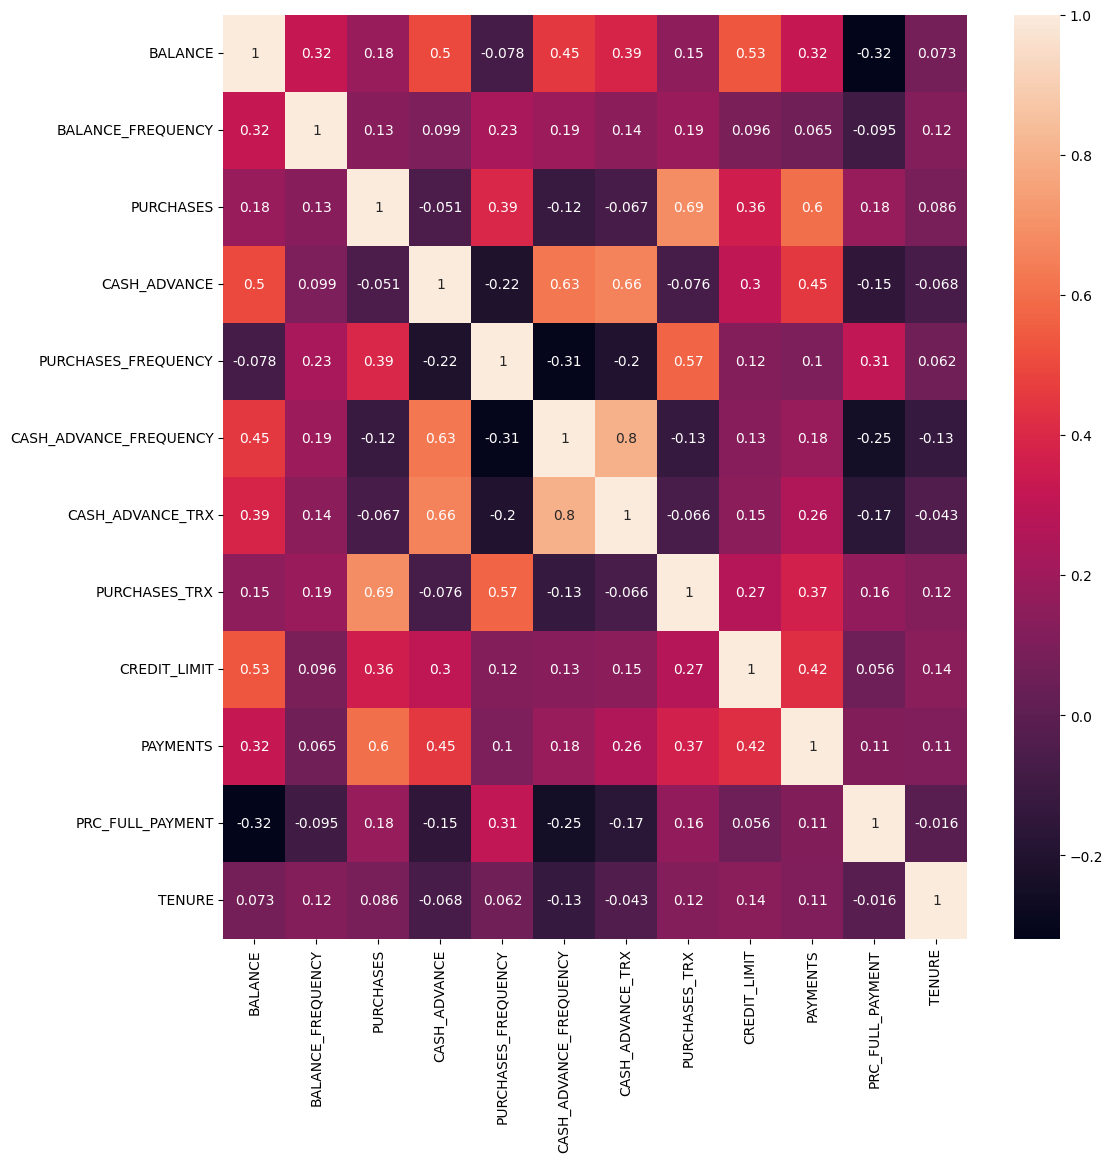

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
scaled_df = scalar.fit_transform(df)

In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.468991,-0.970894
1,2.206537,-1.033535
2,-0.316592,0.850899
3,-0.381012,-0.570296
4,-1.100426,-0.937614
...,...,...
8945,-1.769658,-0.078334
8946,-1.538477,-0.489998
8947,-1.786394,-0.617320
8948,-1.239374,-1.937982


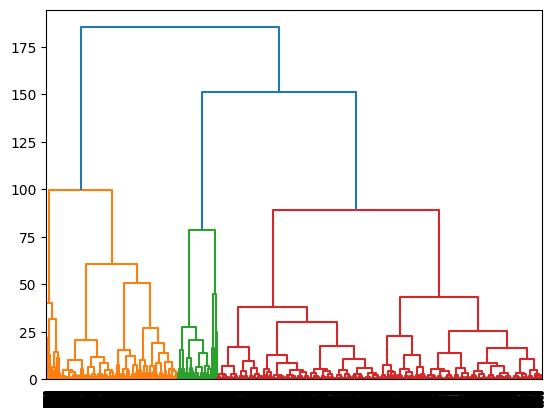

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix
linkage_matrix = linkage(pca_df, method='ward')

# Create dendrogram
dendrogram(linkage_matrix)
plt.show()


In [18]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')  # You can adjust the number of clusters and linkage method
agg_labels = agg_clustering.fit_predict(scaled_df)
pca_df['Cluster'] = agg_labels  # Add cluster labels to the PCA dataframe

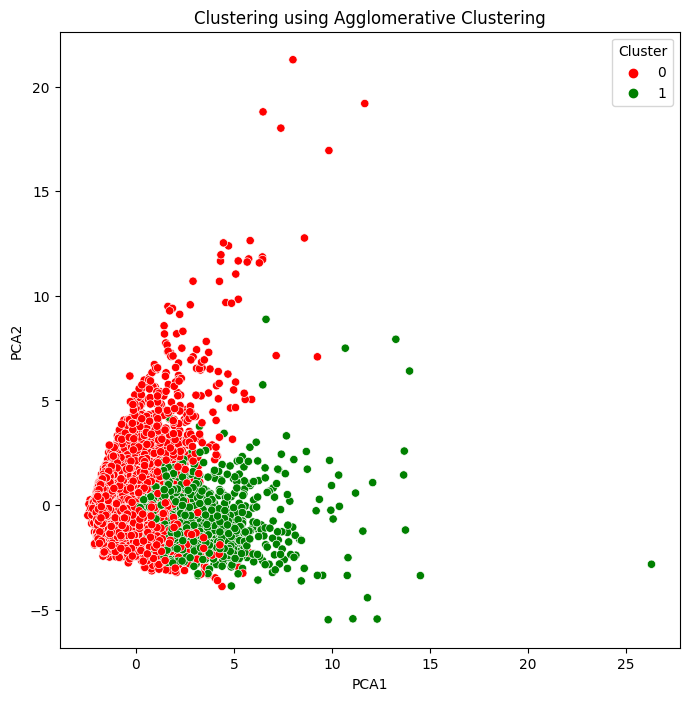

In [19]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=pca_df, palette=['red', 'green', 'blue', 'black','yellow'])
plt.title("Clustering using Agglomerative Clustering")
plt.show()

In [20]:
# Creating a target column "Cluster" for storing the cluster segment
agg_cluster_df = pd.concat([df, pd.DataFrame({'Agglomerative Cluster': agg_labels})], axis=1)

In [21]:
agg_cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agglomerative Cluster
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,0.000000,12,0
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12,1
2,2495.148862,1.000000,773.17,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,0.000000,12,0
3,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000000,1.000000,0.000000,0,6,1000.0,325.594462,0.500000,6,0
8946,19.183215,1.000000,300.00,0.000000,1.000000,0.000000,0,6,1000.0,275.861322,0.000000,6,0
8947,23.398673,0.833333,144.40,0.000000,0.833333,0.000000,0,5,1000.0,81.270775,0.250000,6,0
8948,13.457564,0.833333,0.00,36.558778,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6,0


<Axes: xlabel='Agglomerative Cluster', ylabel='count'>

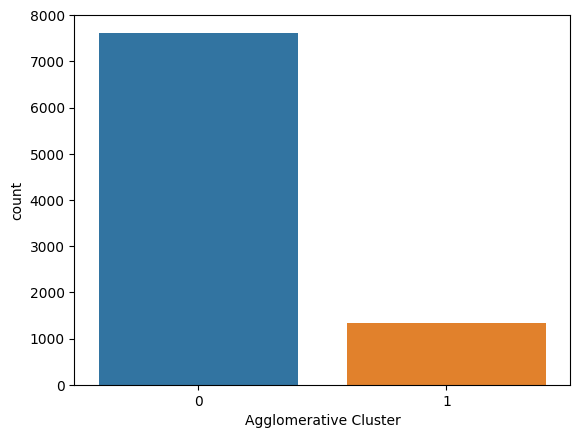

In [22]:
sns.countplot(x='Agglomerative Cluster', data=agg_cluster_df)

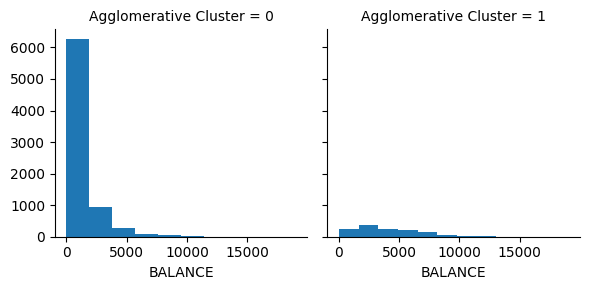

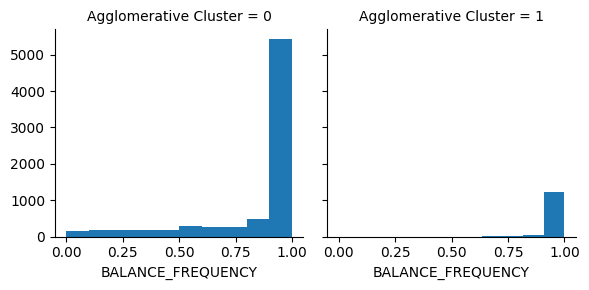

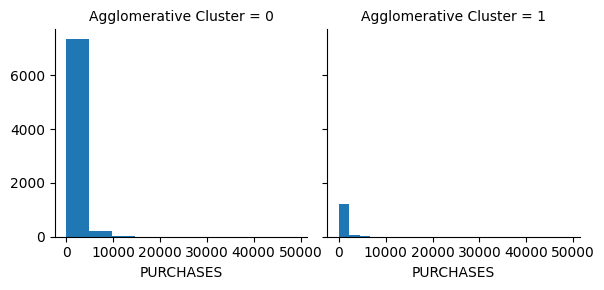

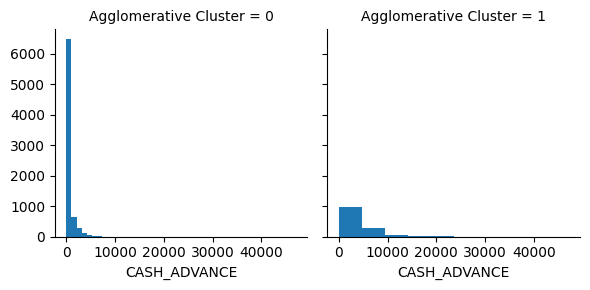

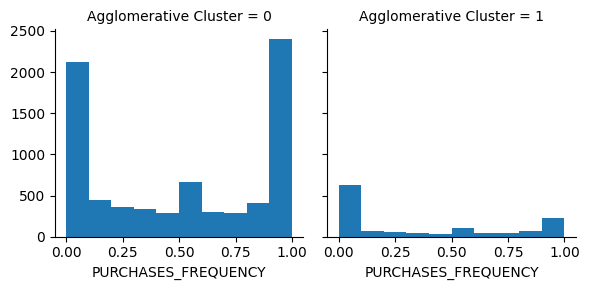

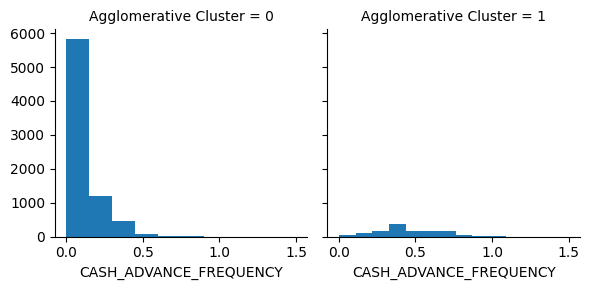

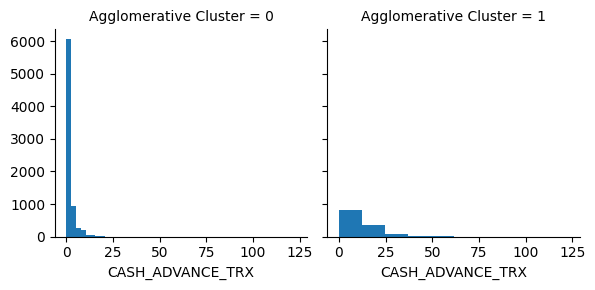

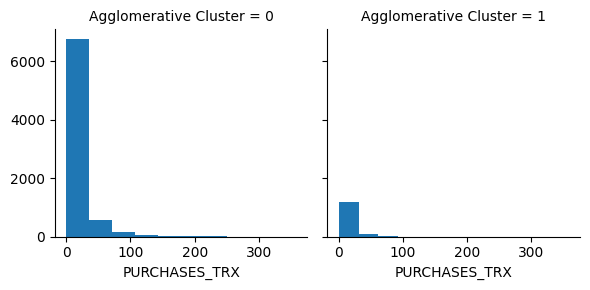

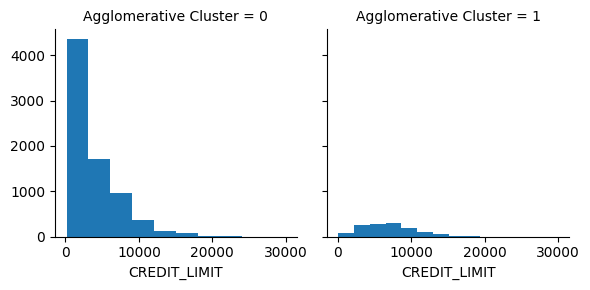

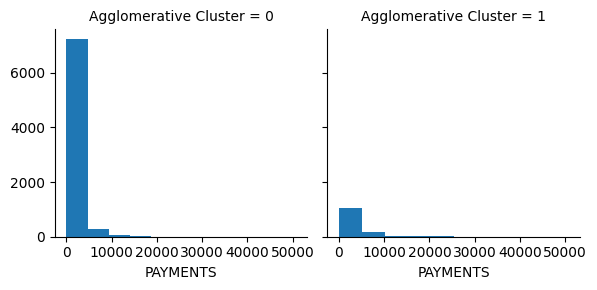

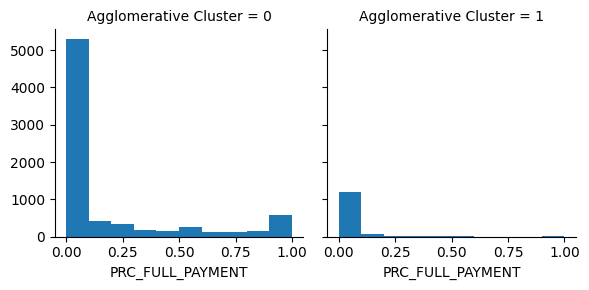

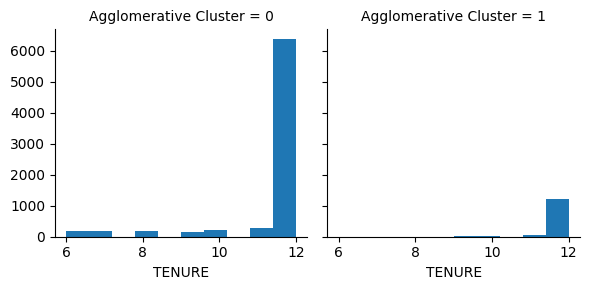

In [23]:
for c in agg_cluster_df.drop(['Agglomerative Cluster'],axis=1):
    grid= sns.FacetGrid(agg_cluster_df, col='Agglomerative Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [24]:
#Saving Scikitlearn models
import joblib
joblib.dump(agg_clustering, "agg_model.pkl")

['agg_model.pkl']

In [25]:
agg_cluster_df.to_csv("agg_Clustered_Customer_Data.csv")

In [26]:
X = agg_cluster_df.drop(['Agglomerative Cluster'],axis=1)
y= agg_cluster_df[['Agglomerative Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [27]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
4921,1871.597836,1.000000,3220.25,2367.006699,0.833333,0.416667,15,28,5500.0,448.564207,0.000000,12
642,306.877248,1.000000,3877.85,0.000000,0.916667,0.000000,0,29,12500.0,3639.443058,1.000000,12
2481,1589.449271,1.000000,255.75,0.000000,0.333333,0.000000,0,5,3500.0,599.044421,0.000000,12
3244,129.314624,1.000000,94.50,0.000000,0.583333,0.000000,0,7,1500.0,132.945860,0.000000,12
6535,92.859389,1.000000,468.96,0.000000,1.000000,0.000000,0,5,1000.0,348.784045,1.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,1175.749847,1.000000,848.26,1032.462268,0.916667,0.083333,2,12,1200.0,2117.531771,0.083333,12
2687,127.808682,1.000000,2802.08,0.000000,1.000000,0.000000,0,36,6500.0,2384.646953,0.363636,12
5874,12.683677,0.363636,31.68,0.000000,0.083333,0.000000,0,1,4000.0,210.141652,0.000000,12
4159,123.396703,0.545455,0.00,1196.579583,0.000000,0.166667,2,0,7000.0,2591.841437,0.250000,12


In [28]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2203   57]
 [  65  360]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2260
           1       0.86      0.85      0.86       425

    accuracy                           0.95      2685
   macro avg       0.92      0.91      0.91      2685
weighted avg       0.95      0.95      0.95      2685



In [30]:
import pickle
filename = 'agg_final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open("D:/clusteringProject/agg_final_model.sav", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.954562383612663 % Acuuracy
